In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
micro_data = {
    "NISPA": {
        'accuracy': [0.792618384 * 100,	0.887752119 * 100,	0.573625212 * 100, 75.13319051] # Last value is average
    },
    "DER": {
        'accuracy': [0.543593315 * 100,	0.53668518 * 100,	0.620156514 * 100, 56.68116696] # Last value is average
    },
    "DER++": {
        'accuracy': [0.619498607 * 100,	0.54866998 * 100,	0.627241963 * 100, 59.84701832] # Last value is average
    },
    "REMIND": {
        'accuracy': [0.826323092 * 100,	0.868459523 * 100,	0.572398484 * 100, 75.57270328] # Last value is average
    },
    "NAIVE": {
        'accuracy': [0.001392757660167131 * 100, 0.3025431160479392 * 100, 0.6320431472081218 * 100, 31.0256305] # Last value is average
    },
}


radiological_data = {
    "NISPA": {
        'accuracy': [0.681770652 * 100,	0.858919549 * 100,	0.946750903 * 100,	0.873690338 * 100,
                     0.814102564  * 100,	0.860576923  * 100, 83.93018214] # Last value is average
    },
    "DER": {
        'accuracy': [0.504356919 * 100,	0.813835989 * 100,	0.94765343 * 100,
                     0.88242142  * 100,	0.557692308  * 100,	0.854166667  * 100,	76.0021122] # Last value is average
    },
    "DER++": {
        'accuracy': [0.567096549 * 100,	0.862806063 * 100,	0.961191336 * 100,
                     0.83701979 * 100,	0.685897436 * 100,	0.841346154 * 100, 79.25595547] # Last value is average
    },
    "REMIND": {
        'accuracy': [0.69292438 * 100,	0.795180738 * 100,	0.939530671 * 100,	0.832363188 * 100,
                     0.75 * 100,	0.854166687 * 100, 81.06942773] # Last value is average
    },
    "NAIVE": {
        'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.6314102564102564*100, 10.52] # Last value is average
    },

}

#data = micro_data
#dataset_name = "Microscopic"

data = radiological_data
dataset_name = "Radiological"

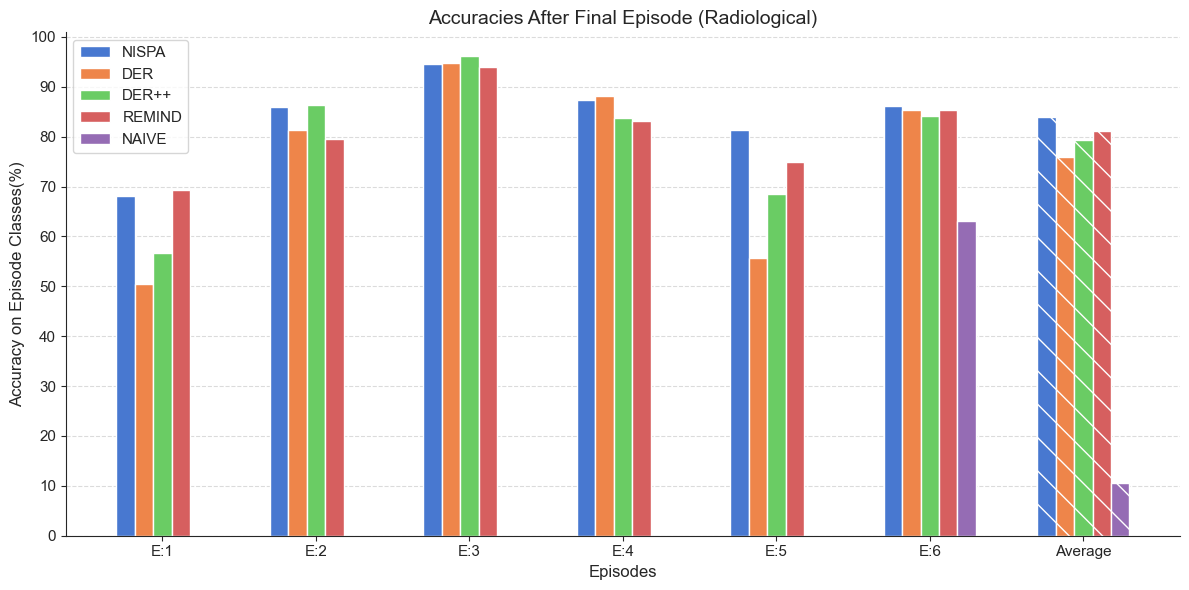

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data

# Set the figure size and style
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(12, 6))

# Set the colors
colors = sns.color_palette("muted", len(data.keys()))

# Create the x-axis labels
x_labels = ["E:{}".format(i) for i in range(1, data['NISPA']['accuracy'].__len__() )] + ["Average"]

# Calculate the number of methods and the width of each bar
num_methods = len(data.keys())
bar_width = 0.6 / num_methods
error_bar_config = {'elinewidth': 0.5}
# Plot the bars
for i, (key, values) in enumerate(data.items()):
    accuracies = np.array(values['accuracy'])
    x_pos = np.arange(len(accuracies)) + (i - (num_methods - 1) / 2) * bar_width

    for j, (acc, sigma, x) in enumerate(zip(accuracies, accuracies, x_pos)):
        # Add hatch marks to the last bars at x_tick "Task 6"
        if j == len(accuracies) - 1:
            hatch_style = '\\'
        else:
            hatch_style = ''
        ax.bar(x, acc, width=bar_width, color=colors[i], label=key if j == 0 else "", hatch=hatch_style,
                error_kw=error_bar_config)

# Add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy on Episode Classes(%)', fontsize=12)
ax.set_xlabel('Episodes', fontsize=12)
ax.set_title('Accuracies After Final Episode ({})'.format(dataset_name), fontsize=14)
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, fontsize=11, ha='center')
ax.set_yticks(np.arange(0, 101, 10))
ax.set_yticklabels(np.arange(0, 101, 10), fontsize=11)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
ax.legend(fontsize=11)

# Set the axis tick and label styles
sns.despine()
ax.tick_params(axis='both', which='major', labelsize=11)

# Save the plot
fig.tight_layout()
fig.savefig('model_comparison_{}.png'.format(dataset_name), dpi=300)



